#### 0. Przygotowanie bibliotek i narzędzi.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# przygotowanie danych
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# regresja logistyczna
from sklearn.linear_model import LogisticRegression

# random forest
from sklearn.ensemble import RandomForestClassifier

# xgboost
from xgboost import XGBClassifier

# sieć neuronowa MLP (Multi-Layer Perceptron)
from sklearn.neural_network import MLPClassifier

# metryki
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

#### 1. Załadowanie danych z pliku ```bank-full.csv```.

In [5]:
file_path = "bank-full.csv"

In [6]:
df = pd.read_csv(file_path, delimiter=';')

#### 2. Weryfikacja i ocena jakości danych.

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df.shape

(45211, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
# sprawdzenie duplikatów
duplicates = df.duplicated().sum()
duplicates

0

In [12]:
# sprawdzenie liczby unikalnych wartości w każdej kolumnie
unique_values = df.nunique()
print("\nLiczba unikalnych wartości w kolumnach:")
print(unique_values)


Liczba unikalnych wartości w kolumnach:
age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [13]:
for c in df.columns:
    print(f"\nUnikalne wartości w kolumnie {c}:\n")
    print(df[c].unique())


Unikalne wartości w kolumnie age:

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

Unikalne wartości w kolumnie job:

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unikalne wartości w kolumnie marital:

['married' 'single' 'divorced']

Unikalne wartości w kolumnie education:

['tertiary' 'secondary' 'unknown' 'primary']

Unikalne wartości w kolumnie default:

['no' 'yes']

Unikalne wartości w kolumnie balance:

[ 2143    29     2 ...  8205 14204 16353]

Unikalne wartości w kolumnie housing:

['yes' 'no']

Unikalne wartości w kolumnie loan:

['no' 'yes']

Unikalne wartości w kolumnie contact:

['unknown' 'cellular' 'telephone']

Unikalne wartości w kolumnie day:

[ 5  6  7  8  9 12 13 14 15 16 19 

In [14]:
# podstawowe statystyki dla zmiennych numerycznych
print("\nPodstawowe statystyki zmiennych numerycznych:")
print(df.describe())


Podstawowe statystyki zmiennych numerycznych:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000

In [15]:
# sprawdzenie wartości w kolumnach kategorycznych
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nUnikalne wartości w kolumnach kategorycznych:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Unikalne wartości w kolumnach kategorycznych:
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [16]:
# sprawdzenie brakujących wartości
print("\nBrakujące wartości w kolumnach:")
print(df.isnull().sum())


Brakujące wartości w kolumnach:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#### 3. Eksploracyjna Analiza Danych

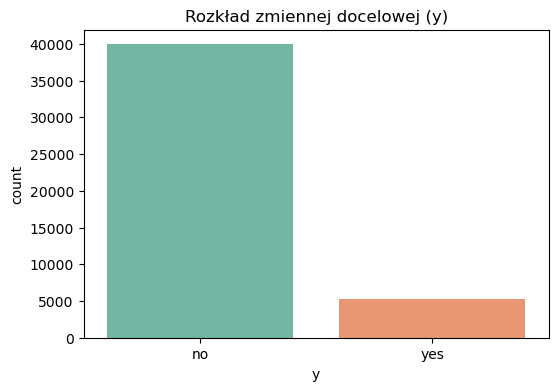

In [18]:
# rozkład zmiennej docelowej 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x=df['y'], order=df['y'].value_counts().index, palette="Set2")
plt.title("Rozkład zmiennej docelowej (y)")
plt.show()

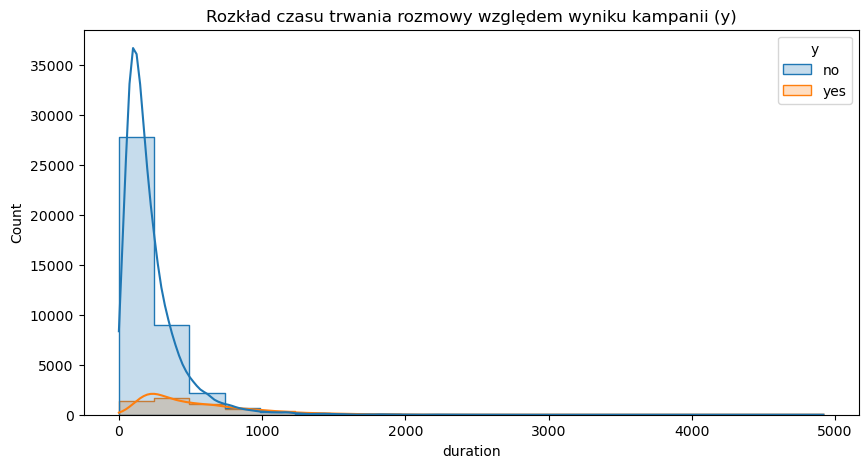

In [19]:
# rozkład długości trwania rozmowy (duration) względem zmiennej docelowej 'y'
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="duration", hue="y", bins=20, kde=True, element="step", common_norm=False)
plt.title("Rozkład czasu trwania rozmowy względem wyniku kampanii (y)")
plt.show()

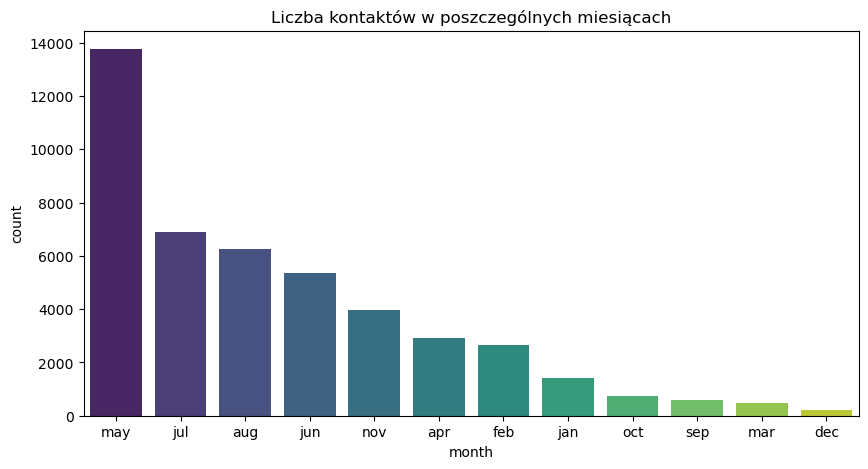

In [20]:
# wykres liczby kontaktów na miesiąc (analiza sezonowości)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="month", order=df["month"].value_counts().index, palette="viridis")
plt.title("Liczba kontaktów w poszczególnych miesiącach")
plt.show()

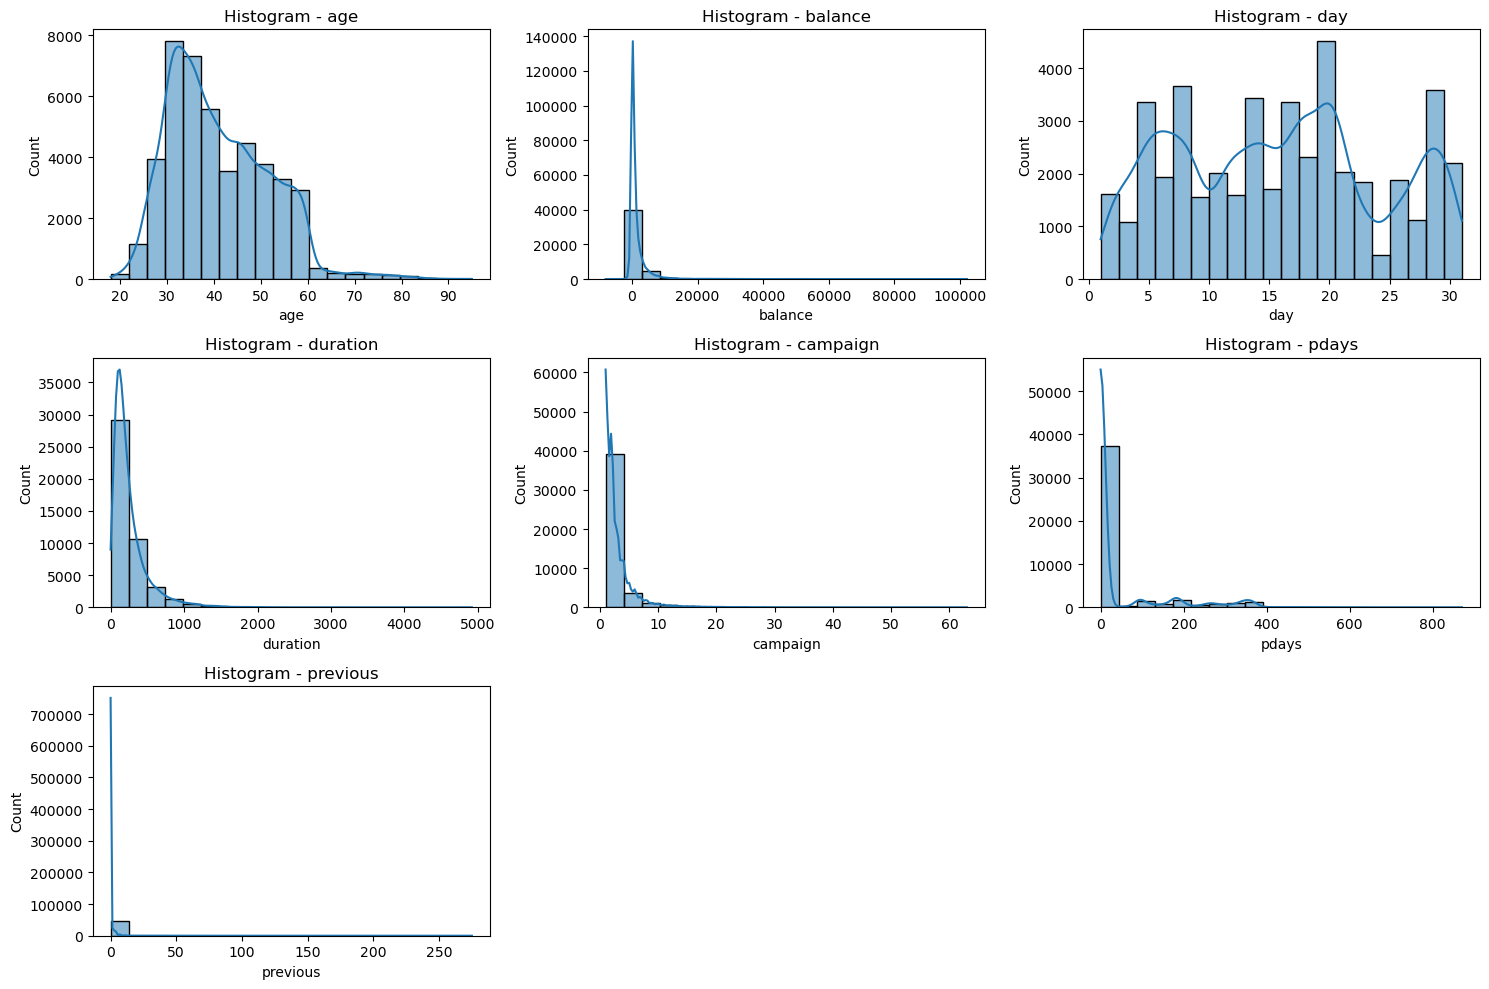

In [21]:
# histogramy dla zmiennych numerycznych
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Tworzy siatkę 3x3 dla wykresów
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram - {col}')
plt.tight_layout()
plt.show()

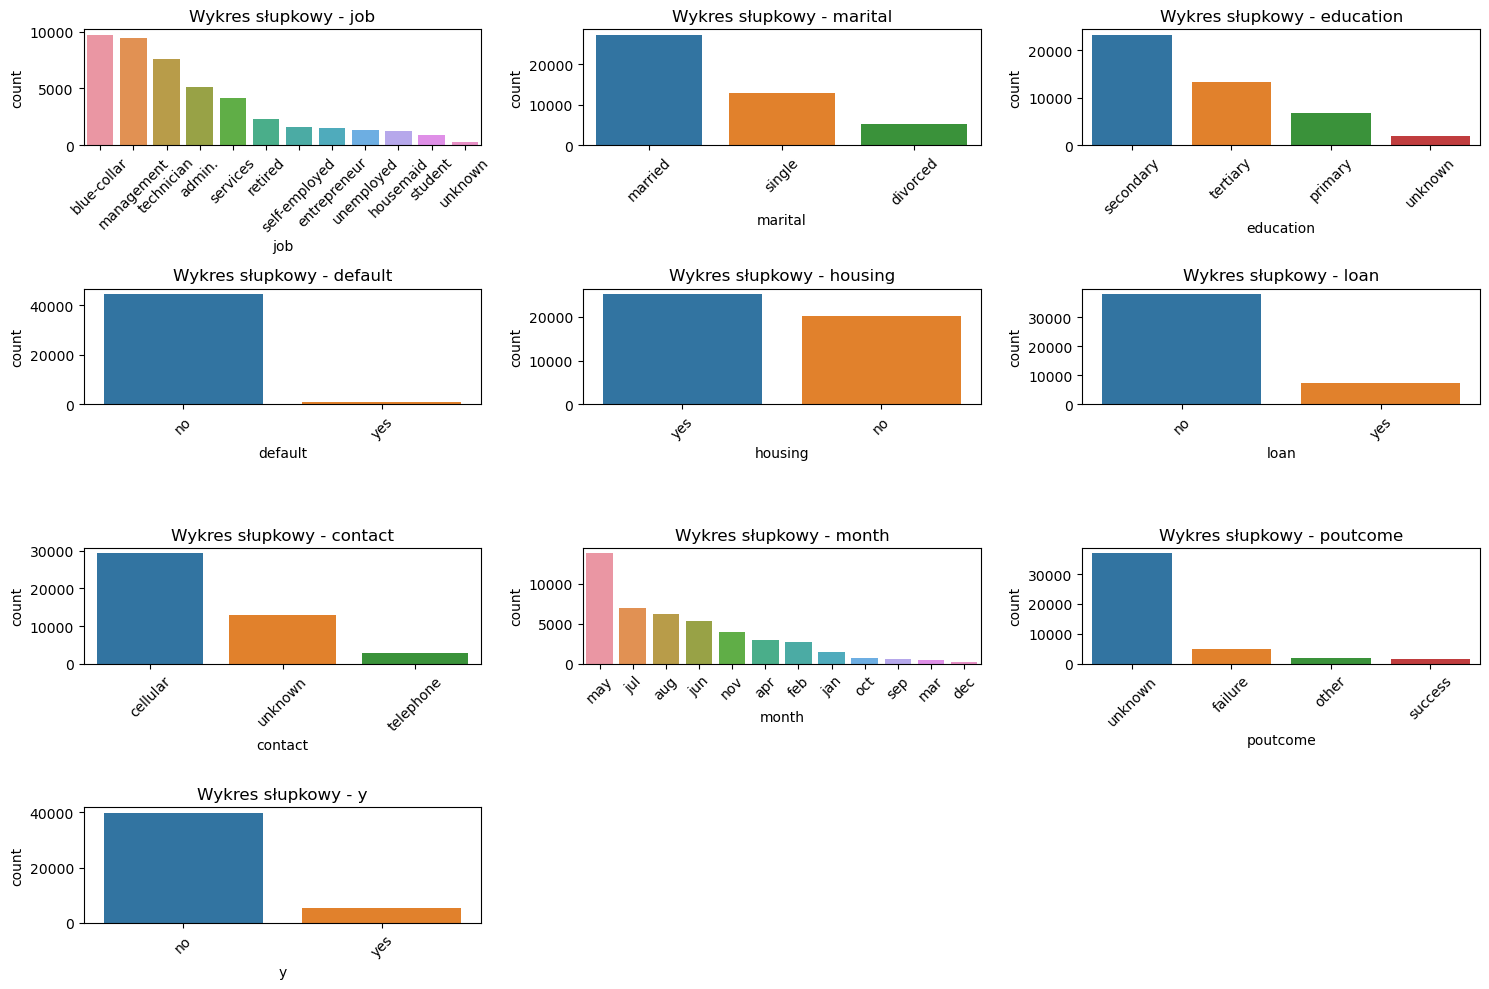

In [22]:
# wykresy słupkowe dla zmiennych kategorycznych
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)  # Tworzy siatkę 4x3 dla wykresów
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Wykres słupkowy - {col}')
    plt.xticks(rotation=45)  # Obrót etykiet, jeśli są długie
plt.tight_layout()
plt.show()

In [23]:
# sprawdzenie potencjalnych wartości odstających w zmiennych numerycznych
print("\nWartości odstające - liczba wartości powyżej 99 percentyla:")
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    upper_threshold = df[col].quantile(0.99)
    outliers = (df[col] > upper_threshold).sum()
    print(f"{col}: {outliers} wartości powyżej 99 percentyla")


Wartości odstające - liczba wartości powyżej 99 percentyla:
age: 433 wartości powyżej 99 percentyla
balance: 453 wartości powyżej 99 percentyla
day: 0 wartości powyżej 99 percentyla
duration: 452 wartości powyżej 99 percentyla
campaign: 451 wartości powyżej 99 percentyla
pdays: 385 wartości powyżej 99 percentyla
previous: 453 wartości powyżej 99 percentyla


**Uwaga: wartości odstajace mogłyby mieć wpływ na skuteczność modelu, ale po wykonaniu testów nie zdecydowano o ich usunięciu (wpływ był znikomy).**

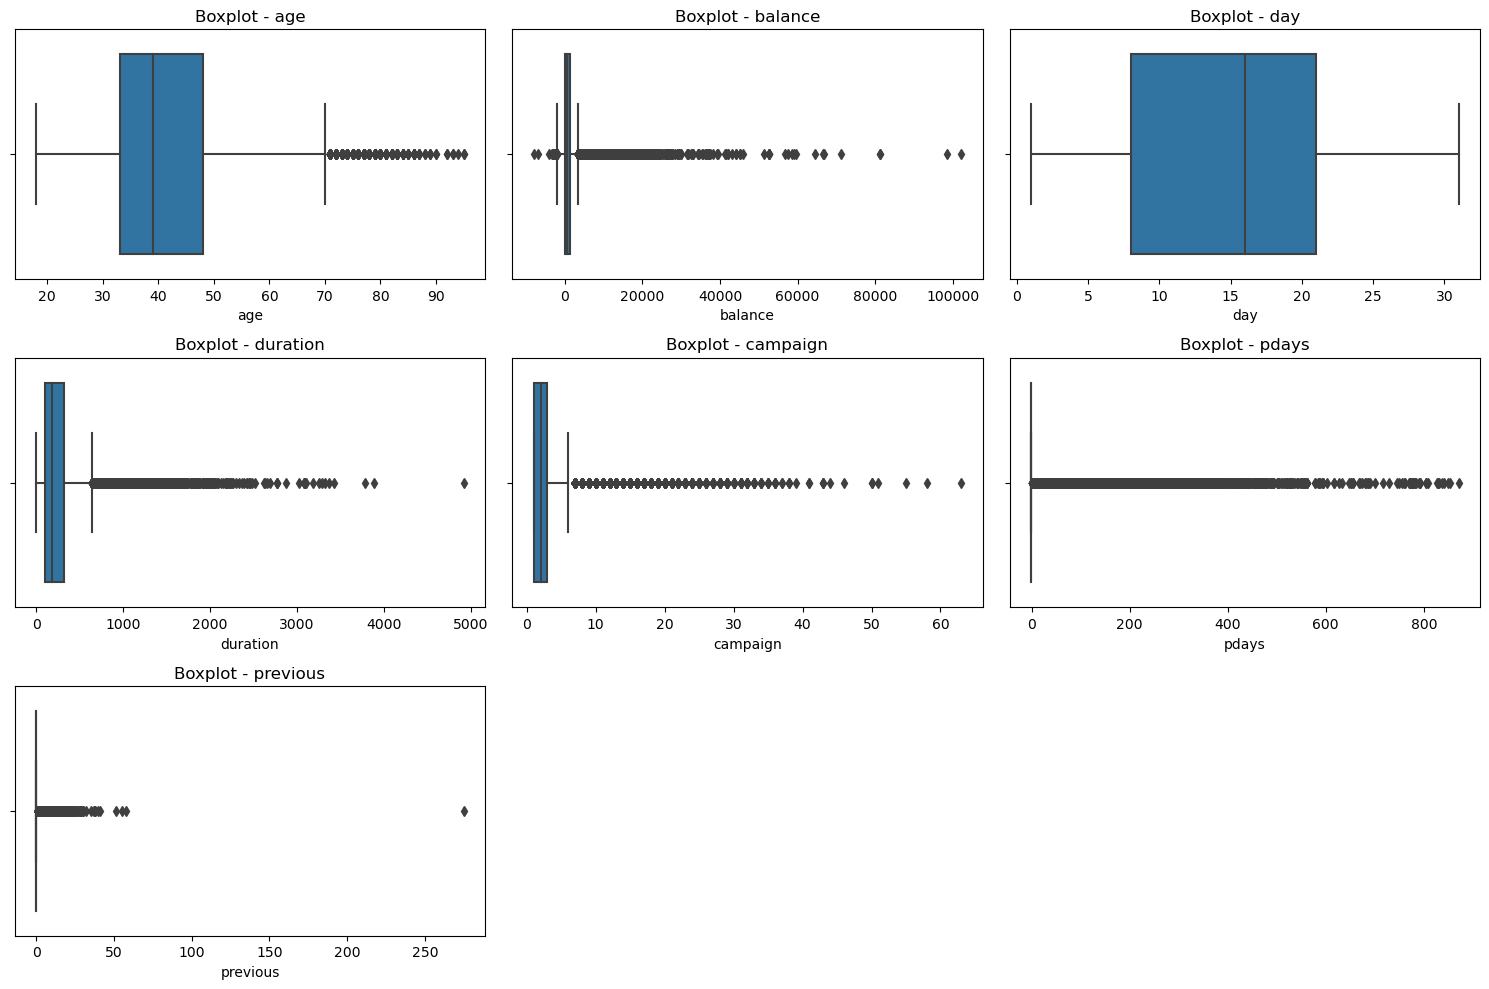

In [25]:
# wykresy pudełkowe (Boxplot) dla analizy wartości odstających
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

In [26]:
# wybór tylko kolumn numerycznych
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# macierz korelacji
corr_matrix = numerical_cols.corr()

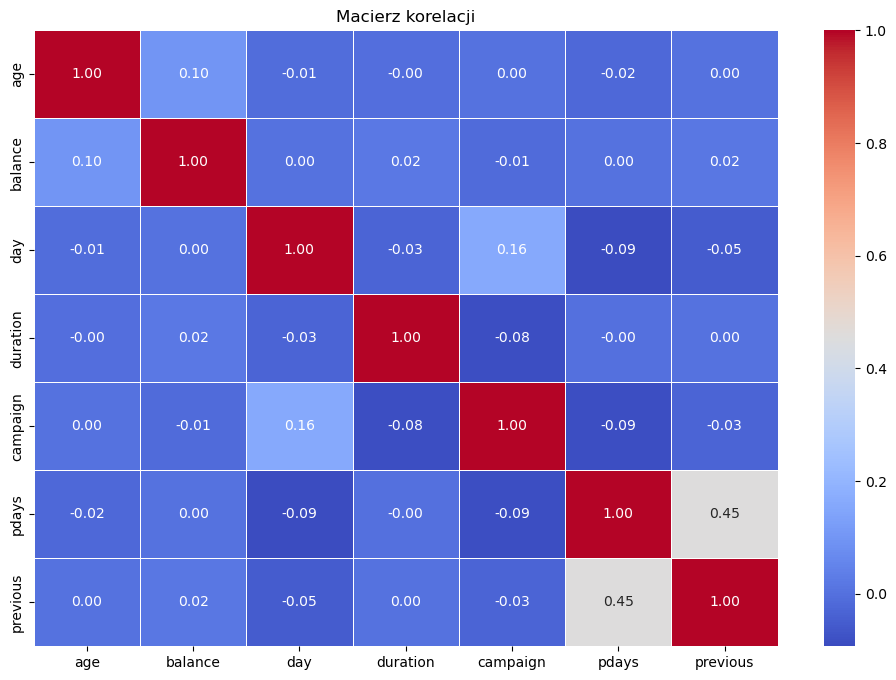

In [27]:
# macierz korelacji jako mapa cieplna (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Macierz korelacji")
plt.show()

#### 4. Przygotowanie modeli i sieci neuronowej.

In [29]:
# wybór zmiennych kategorycznych do zakodowania
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'month', 'poutcome']

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# sprawdzenie nowego kształtu zbioru po kodowaniu
print("Nowy kształt danych po One-Hot Encoding:", df_encoded.shape)

Nowy kształt danych po One-Hot Encoding: (45211, 43)


In [30]:
df_encoded.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [31]:
# upewniamy się, że kolumna docelowa jest binarna
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})

# podział na cechy i etykiety
X_ohe, y_ohe = df_encoded.drop(columns=['y']), df_encoded['y']

# podział na zbiory treningowe i testowe (80/20)
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=42)

In [32]:
# skalowanie danych dla sieci neuronowej
scaler_ohe = StandardScaler()
X_train_ohe_scaled = scaler_ohe.fit_transform(X_train_ohe)
X_test_ohe_scaled = scaler_ohe.transform(X_test_ohe)

In [33]:
# lista modeli do testowania
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='newton-cg'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
}

In [34]:
# sieć neuronowa
neural_network = {"Neural Network": MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu', 
    solver='adam',    # można zmienić na 'lbfgs' dla małych zbiorów
    alpha=0.0001,    # L2 regularization (zmniejsza overfitting)
    batch_size=64,
    learning_rate='adaptive',    # dynamiczne dopasowanie kroku uczenia
    max_iter=2000,
    early_stopping=True,  # zatrzymuje trening, gdy wyniki przestają się poprawiać
    random_state=42
)}

In [35]:
# funkcja do trenowania i oceny modeli
def train_and_evaluate(models, X_train, X_test, y_train, y_test, is_scaled=False):
    results = []
    for name, model in models.items():
        print(f"Trening modelu {name}...")
        
        # jeśli model to sieć neuronowa, używamy wersji skalowanej
        if name == "Neural Network" and is_scaled:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)
        results.append((name, acc, f1, auc))
        
        print(f"{name} - Accuracy: {acc:.4f}, F1-score: {f1:.4f}, AUC: {auc:.4f}")

    return results

In [36]:
# trenowanie modeli
results = train_and_evaluate(models, X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe)

Trening modelu Logistic Regression...
Logistic Regression - Accuracy: 0.8989, F1-score: 0.4494, AUC: 0.6586
Trening modelu Random Forest...
Random Forest - Accuracy: 0.9039, F1-score: 0.5014, AUC: 0.6868
Trening modelu XGBoost...
XGBoost - Accuracy: 0.9064, F1-score: 0.5653, AUC: 0.7329


In [37]:
# trenowanie sieci neuronowej
results_nn = train_and_evaluate(neural_network, X_train_ohe_scaled, X_test_ohe_scaled, y_train_ohe, y_test_ohe, is_scaled=True)

Trening modelu Neural Network...
Neural Network - Accuracy: 0.9034, F1-score: 0.5942, AUC: 0.7667


#### 5. Ocena i porównanie modeli oraz sieci neuronowej.

In [39]:
# łączenie wyników
results_df = pd.DataFrame(results + results_nn, columns=["Model", "Accuracy", "F1-Score", "AUC"])

In [40]:
print(results_df)

                 Model  Accuracy  F1-Score       AUC
0  Logistic Regression  0.898927  0.449398  0.658620
1        Random Forest  0.903904  0.501434  0.686756
2              XGBoost  0.906447  0.565262  0.732885
3       Neural Network  0.903351  0.594243  0.766712


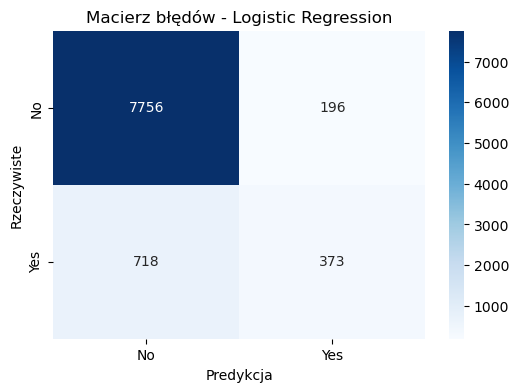

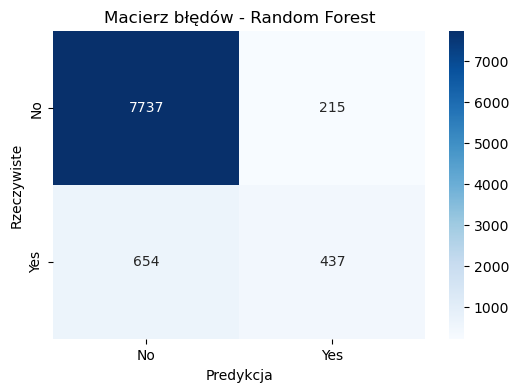

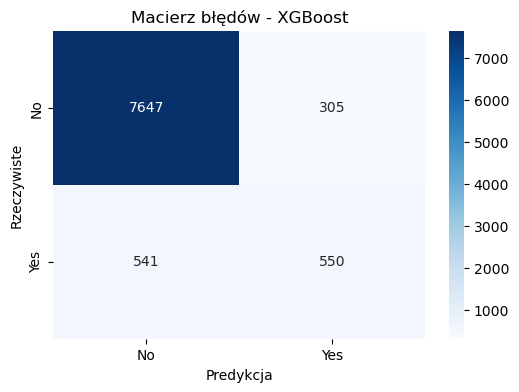

In [41]:
for name in models:
    model = models[name]
    y_pred = model.predict(X_test_ohe)

    # macierz błędów
    cm = confusion_matrix(y_test_ohe, y_pred)
    
    # wizualizacja macierzy błędów
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel("Predykcja")
    plt.ylabel("Rzeczywiste")
    plt.title(f"Macierz błędów - {name}")
    plt.show()

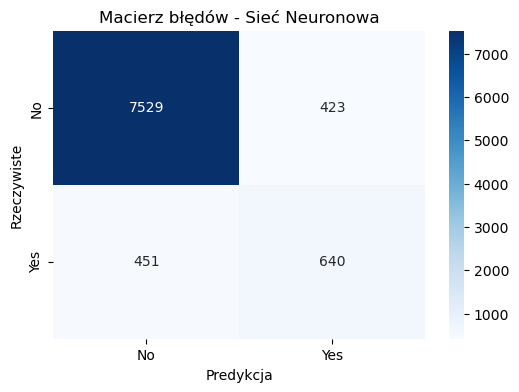

In [42]:
# predykcja sieci neuronowej
nn = neural_network['Neural Network']
y_pred_nn = nn.predict(X_test_ohe_scaled)

# macierz błędów
cm_nn = confusion_matrix(y_test_ohe, y_pred_nn)

# wizualizacja macierzy błędów sieci neuronowej
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywiste")
plt.title("Macierz błędów - Sieć Neuronowa")
plt.show()